In [1]:
from utils import *
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(base_path="./data"):
    """ Load the data in PyTorch Tensor.

    :return: (zero_train_matrix, train_data, valid_data, test_data)
        WHERE:
        zero_train_matrix: 2D sparse matrix where missing entries are
        filled with 0.
        train_data: 2D sparse matrix
        valid_data: A dictionary {user_id: list,
        user_id: list, is_correct: list}
        test_data: A dictionary {user_id: list,
        user_id: list, is_correct: list}
    """
    train_matrix = load_train_sparse(base_path).toarray()
    valid_data = load_valid_csv(base_path)
    test_data = load_public_test_csv(base_path)

    zero_train_matrix = train_matrix.copy()
    # Fill in the missing entries to 0.
    zero_train_matrix[np.isnan(train_matrix)] = 0
    # Change to Float Tensor for PyTorch.
    zero_train_matrix = torch.FloatTensor(zero_train_matrix)
    train_matrix = torch.FloatTensor(train_matrix)

    return zero_train_matrix, train_matrix, valid_data, test_data

In [3]:
zero_train_matrix, train_matrix, valid_data, test_data = load_data()

In [4]:
df_training=pd.DataFrame(train_matrix.numpy())
df_training.describe()

,0,1,2,3,4,5,6,7,8,9,...,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773
count,33.000000,26.000000,28.000000,38.000000,26.000000,22.000000,30.000000,30.000000,24.000000,29.000000,...,23.000000,22.000000,16.000000,23.000000,12.000000,10.000000,34.000000,11.000000,7.000000,28.000000
mean,0.424242,0.538462,0.500000,0.710526,0.269231,0.409091,0.733333,0.700000,0.375000,0.689655,...,0.434783,0.545455,0.562500,0.521739,0.916667,0.600000,0.735294,0.454545,0.714286,0.500000
std,0.501890,0.508391,0.509175,0.459606,0.452344,0.503236,0.449776,0.466092,0.494535,0.470824,...,0.506870,0.509647,0.512348,0.510754,0.288675,0.516398,0.447811,0.522233,0.487950,0.509175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.500000,0.000000
50%,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
numStudents =df_training.shape[0]
numQuestions =df_training.shape[1]
print("Number of Students:", numStudents)
print("Number of Questions:", numQuestions)

Number of Students: 542
Number of Questions: 1774


In [6]:
trainmatrix_np=train_matrix.numpy()
sparsity=len(trainmatrix_np[np.isnan(trainmatrix_np)])/(numStudents*numQuestions)
print("sparsity:", sparsity)



sparsity: 0.9410426122299554


<ipython-input-7-df1acbcad817>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df["Label"]=[0,1]


<AxesSubplot:>

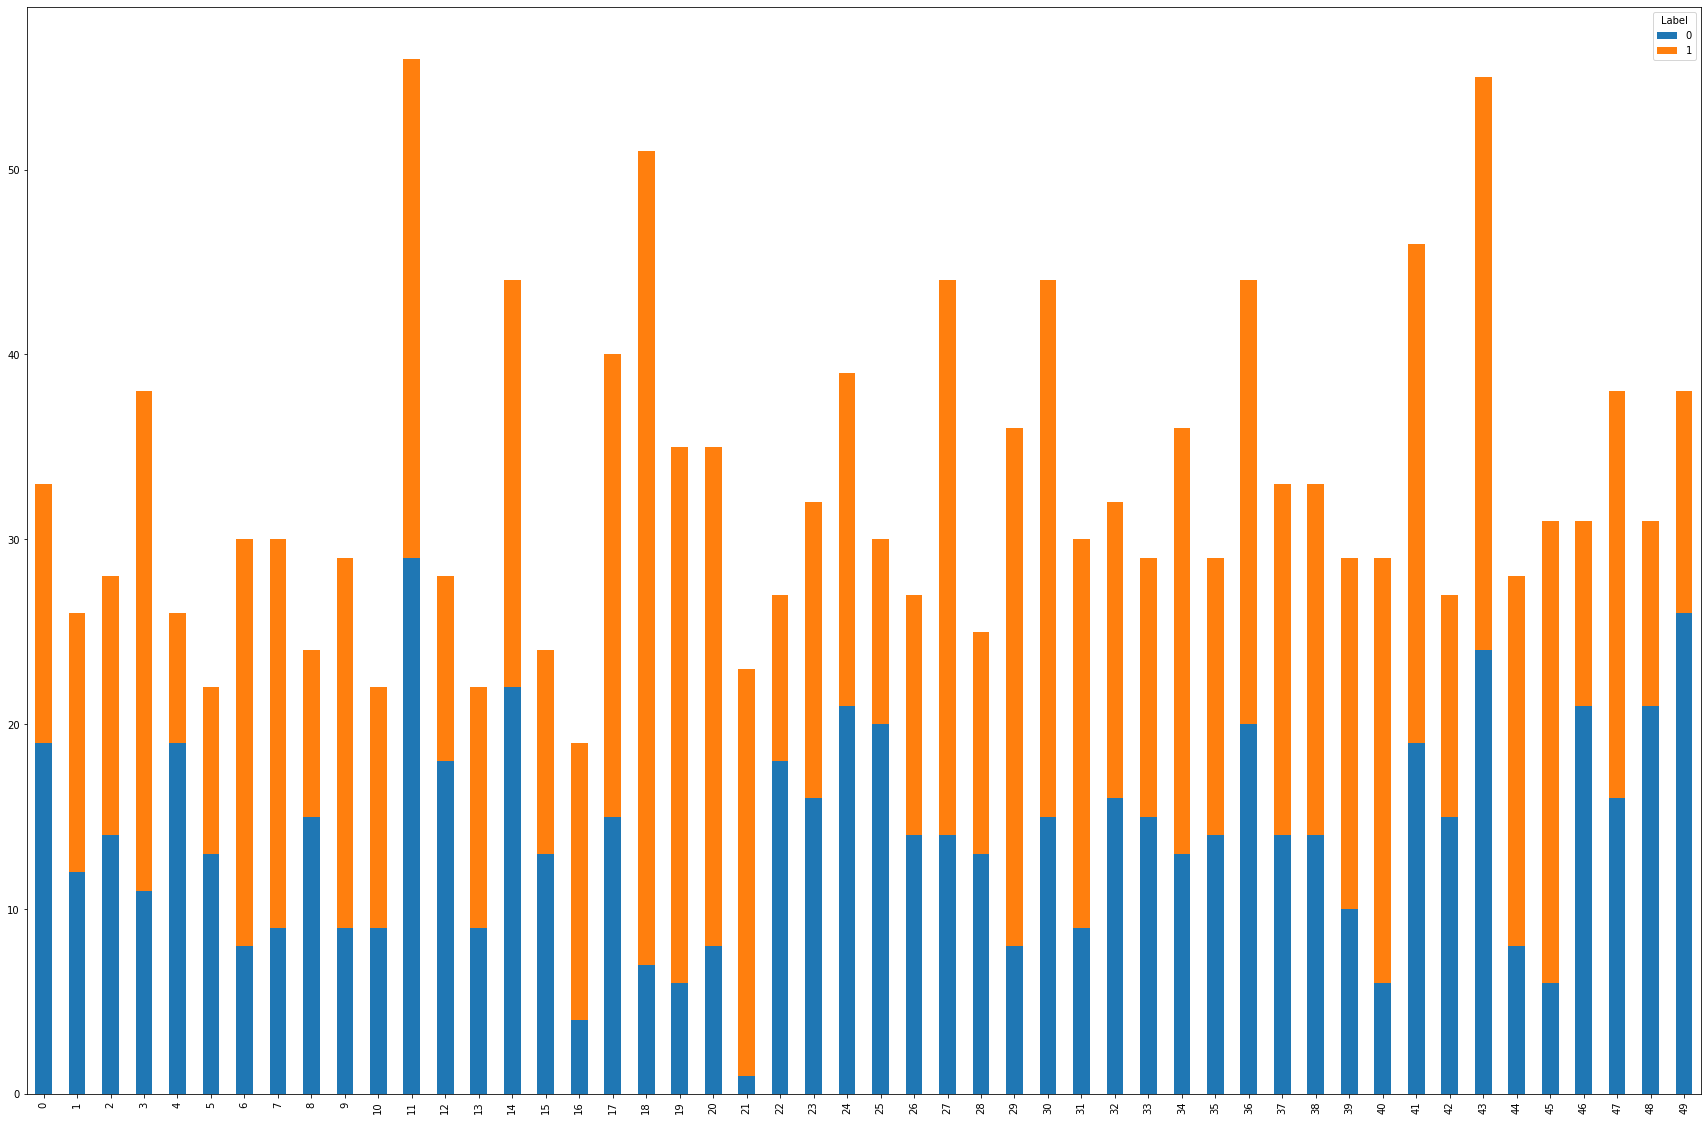

In [7]:
def freqsummary(df_training):
    new_df=pd.DataFrame()
    for ci in list(df_training.columns):
        temp=pd.DataFrame(df_training[ci].value_counts())
        new_df=pd.concat([new_df,temp],axis=1)
    new_df["Label"]=[0,1]
    new_df.set_index("Label",inplace=True)
    return new_df

new_df=freqsummary(df_training)
new_df_plot=new_df.T[:50]
new_df_plot.plot(kind="bar",figsize=(30,20),stacked=True)

Text(0.5, 1.0, 'positive and negative training samples available for each question')

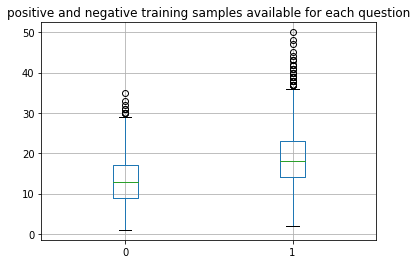

In [8]:
new_df.T.boxplot()
plt.title("positive and negative training samples available for each question")

In [9]:
#new_df['mean'] = new_df.mean(axis=1)
#new_df['std'] = new_df.std(axis=1)
# new_df.T.to_csv("positive_negative_perquestion.csv",index=False)

### For each question, we have average of 12.85 negatives records and 19.12 positive records 

<ipython-input-7-df1acbcad817>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df["Label"]=[0,1]


<AxesSubplot:>

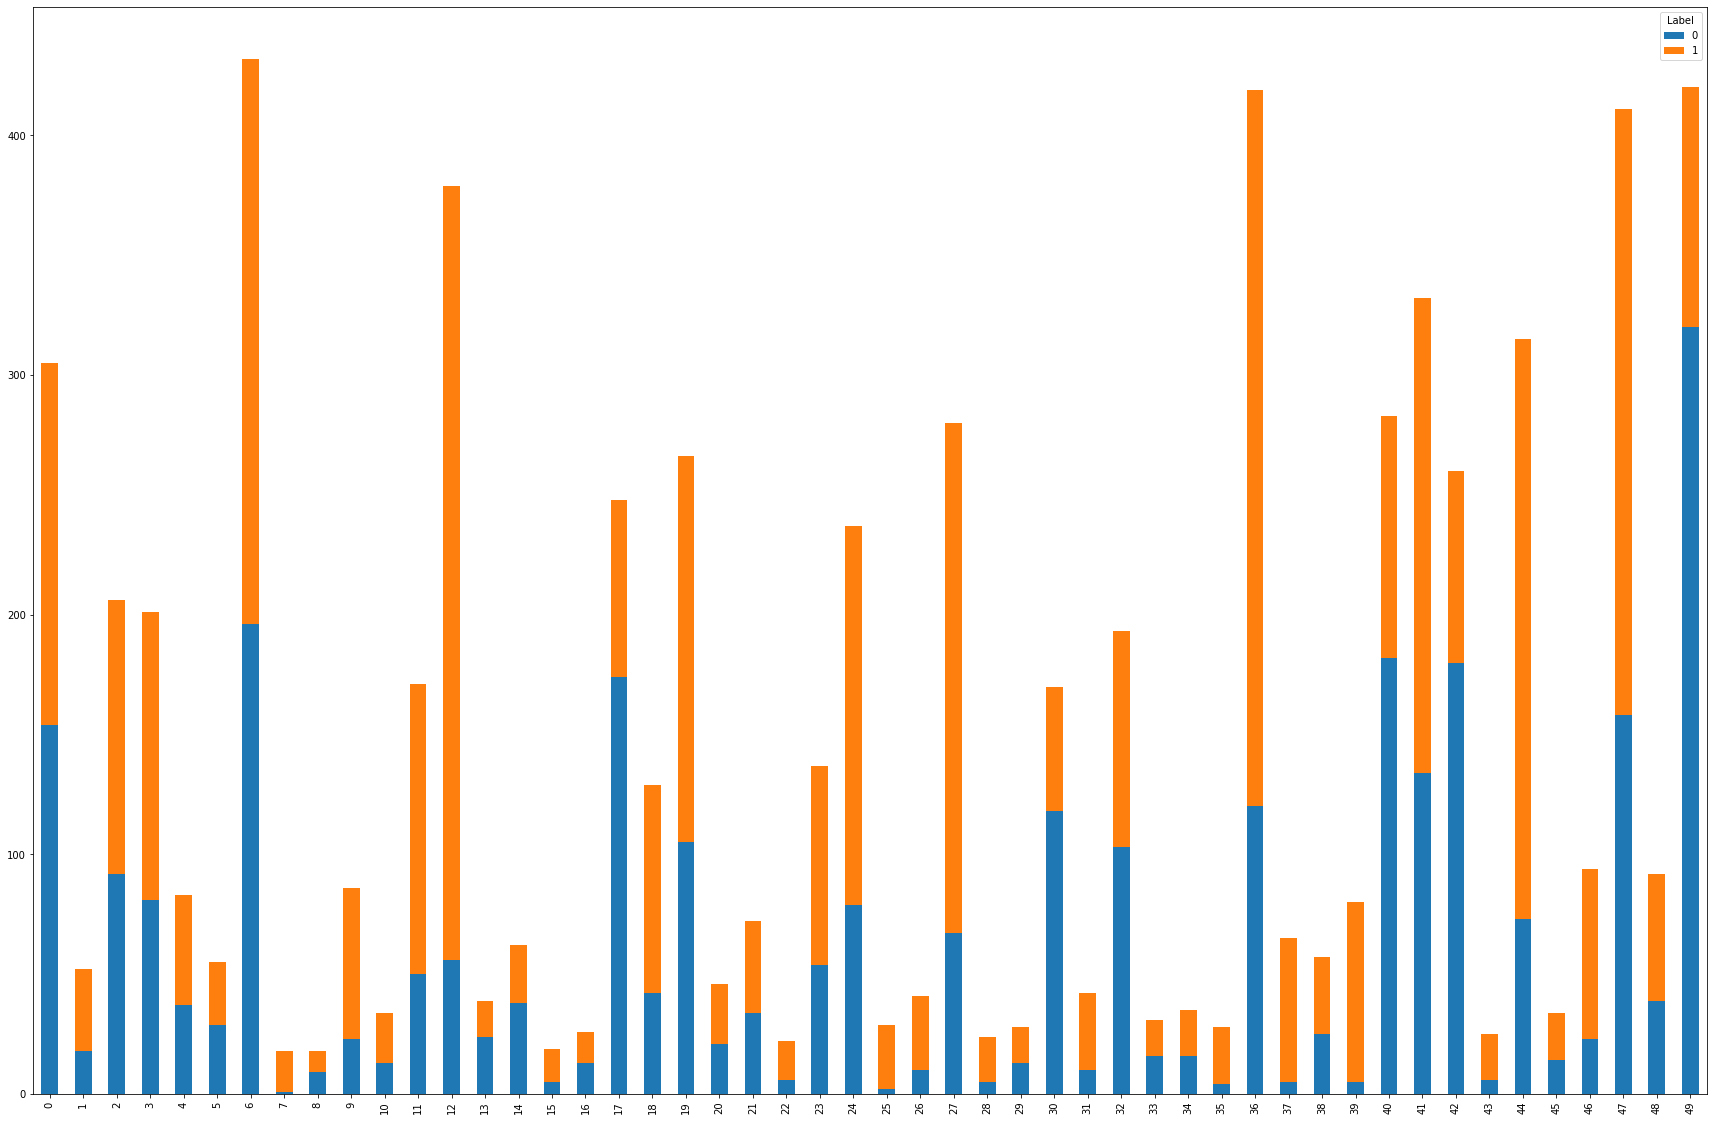

In [10]:
new_df2=freqsummary(pd.DataFrame(train_matrix.numpy().T))
new_df_plot2=new_df2.T[0:50]
new_df_plot2.plot(kind="bar",figsize=(30,20),stacked=True)


Text(0.5, 1.0, 'positive and negative training samples available for each student')

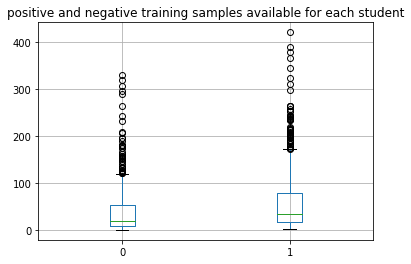

In [11]:
new_df2.T.boxplot()
plt.title("positive and negative training samples available for each student")

In [12]:
#new_df2['mean'] = new_df2.mean(axis=1)
#new_df2['std'] = new_df2.std(axis=1)
# new_df2.T.to_csv("positive_negative_perstudent.csv",index=False)